In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

# from dotenv import load_dotenv
# load_dotenv()
# print(os.environ.get("ROOTSYS"))
# !source $ROOTSYS/bin/thisroot.sh

In [3]:
import ROOT as root

Welcome to JupyROOT 6.18/00


In [4]:
data_dir = "/home/watchman/Documents/lappdsoft/lappd/data/horizontal/20230505/y90"

In [5]:
xpos = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

In [6]:
deltat_binmin = -1.2
deltat_binmax = 1.2
deltat_bin_width = 0.04
deltat_bins = np.arange(deltat_binmin, deltat_binmax, deltat_bin_width)

In [7]:
deltat = {}
reco_pos = {}

for pos in xpos:
    try:
        deltat[pos] = np.load(f"{data_dir}/x{pos}_deltat.npy")
        reco_pos[pos] = np.load(f"{data_dir}/x{pos}_pos.npy")
    except FileNotFoundError:
        print(f"Could not find file for xpos {pos}")

In [8]:
def plot_hist(pos):
    print(f"Plotting xpos {pos}")
    try:
        plt.hist(deltat[pos], deltat_bins, histtype="step", label=f"X={pos} mm", alpha=0.8, density=True)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

Plotting xpos 190


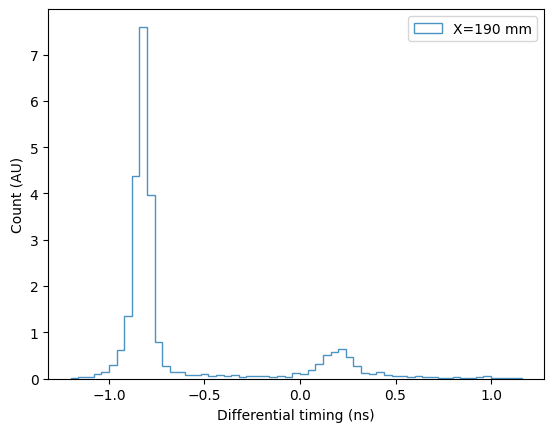

In [9]:
vec_plot_hist([190])
plt.legend()
plt.xlabel("Differential timing (ns)")
plt.ylabel("Count (AU)")
plt.show()

In [10]:
reco_pos_binmin = -105
reco_pos_binmax = 105
reco_pos_bin_width = 2
reco_pos_bins = np.arange(reco_pos_binmin, reco_pos_binmax, reco_pos_bin_width)

In [11]:
def plot_hist(pos):
    print(f"Plotting xpos {pos}")
    try:
        plt.hist(reco_pos[pos], reco_pos_bins, histtype="step", label=f"X={pos} mm", alpha=0.8, density=True)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

Plotting xpos 30
Plotting xpos 40
Plotting xpos 50
Plotting xpos 60
Plotting xpos 70
Plotting xpos 80
Plotting xpos 90
Plotting xpos 100
Plotting xpos 110
Plotting xpos 120
Plotting xpos 130
Plotting xpos 140
Plotting xpos 150
Plotting xpos 160
Plotting xpos 170
Plotting xpos 180
Plotting xpos 190
Plotting xpos 200
Plotting xpos 210


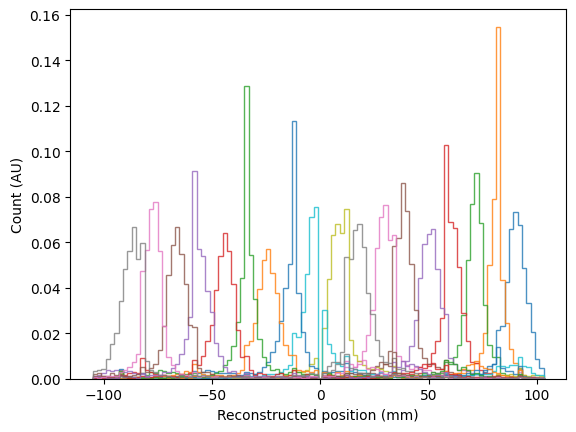

In [12]:
vec_plot_hist([30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210])
plt.xlabel("Reconstructed position (mm)")
plt.ylabel("Count (AU)")
plt.show()

In [13]:
means = []
stds = []

for pos in np.asarray(xpos):
    th1 = root.TH1F("hist", "hist", 150, -2, 2)
    for value in np.asarray(deltat[pos]):
        th1.Fill(value)
    th1.SetTitle("Differential timing;ns;Count")
    fit = root.TF1("fit", "gaus")
    th1.Fit(fit, "Q")
    means.append(fit.GetParameter(1))
    stds.append(fit.GetParameter(2))
    del fit
    del th1
print(means)
print(stds)

[0.9739332579942028, 0.872703583783976, 0.7630278012423118, 0.6582687816053047, 0.5424660080219216, 0.42164554984718217, 0.30988988994294886, 0.19396646168108048, 0.08358726762523128, -0.03348600995916039, -0.1429364443019654, -0.2575809381443526, -0.36100816509114764, -0.4810148792621625, -0.598237012732703, -0.7142683809096225, -0.18566643310757397, -0.9431876693768709]
[0.04858748131488058, 0.04149593170366838, 0.04216677451274466, 0.05254020634358136, 0.0551494683021583, 0.042574861748444714, 0.05294861240415518, 0.056947515313754526, 0.0504950052249347, 0.04873950136415873, 0.055369154530848605, 0.05716621219086868, 0.04658713675537297, 0.052759977450981946, 0.05880804870688946, 0.04513575700527823, 0.7058075120711701, 0.05401612327049893]


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


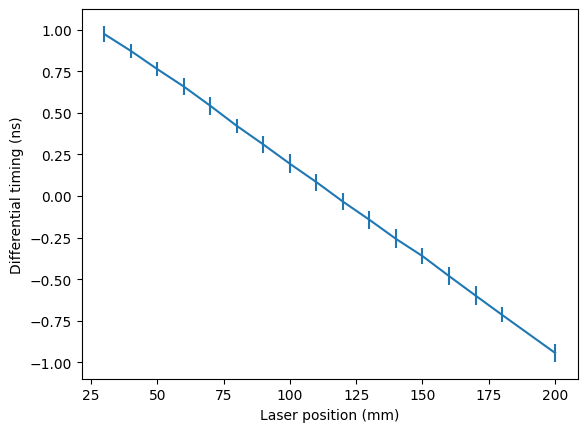

In [14]:
cut = np.asarray(stds) < 0.1
plt.errorbar(np.asarray(xpos)[cut], np.asarray(means)[cut], yerr=np.asarray(stds)[cut])
plt.xlabel("Laser position (mm)")
plt.ylabel("Differential timing (ns)")
plt.show()

In [15]:
params, cov = np.polyfit(np.asarray(xpos)[cut], np.asarray(means)[cut], 1, cov=True, w=1.0 / np.asarray(stds)[cut])

In [16]:
def grad_to_v(grad):
    v = np.abs(grad)
    v = v / 2
    v = v * 10
    v = 1.0 / v
    v /= 29.97
    return v
    

In [17]:
prop_v = grad_to_v(params[0])
print("Fit params: ", params)
print("Cov: \n", cov)
error = cov[0][0] / params[0] * prop_v
print("Propagation velocity: ", prop_v, "c, error: ", np.sqrt(np.abs(error)))

Fit params:  [-0.01131607  1.32707604]
Cov: 
 [[ 7.96074394e-10 -8.43831577e-08]
 [-8.43831577e-08  1.10185104e-05]]
Propagation velocity:  0.5897225220940122 c, error:  0.00020368212409567694


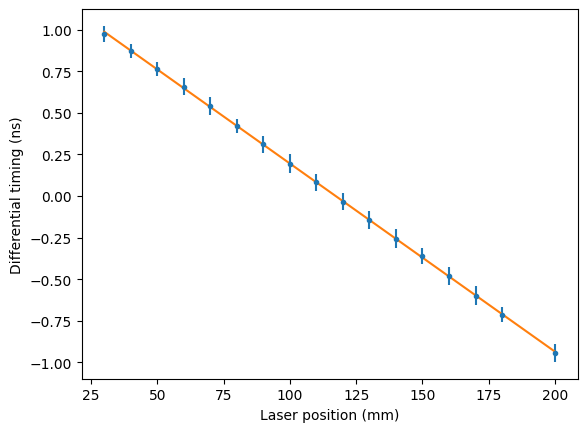

In [25]:
cut = np.asarray(stds) < 0.1
plt.errorbar(np.asarray(xpos)[cut], np.asarray(means)[cut], yerr=np.asarray(stds)[cut], marker="o", markersize=3, linestyle="")
fit = np.asarray(xpos)[cut] * params[0] + params[1]
plt.plot(np.asarray(xpos)[cut], fit)
plt.xlabel("Laser position (mm)")
plt.ylabel("Differential timing (ns)")
plt.show()

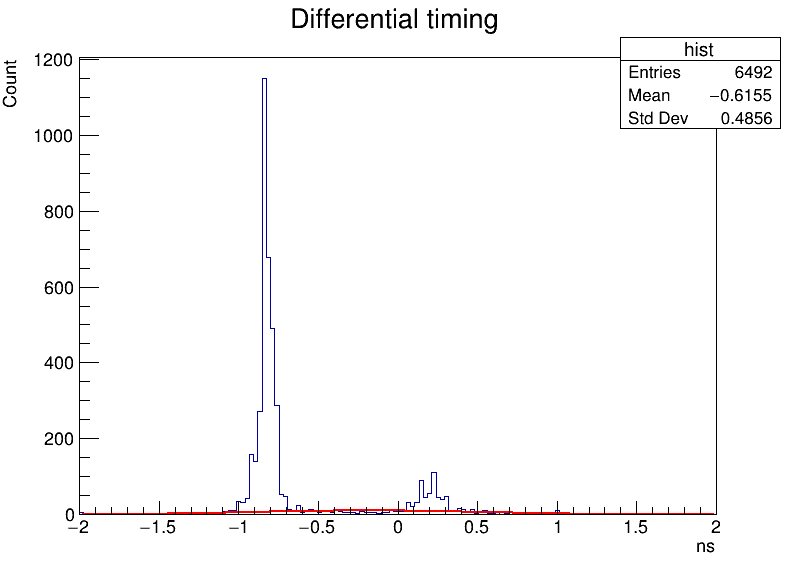

In [ ]:
c = root.TCanvas("myCanvasName","The Canvas Title",800,600)
th1 = root.TH1F("hist", "hist", 150, -2, 2)
for value in np.asarray(deltat[190]):
    th1.Fill(value)
th1.SetTitle("Differential timing;ns;Count")
fit = root.TF1("fit", "gaus")
th1.Fit(fit, "Q")
th1.Draw()
c.Draw()